In [1]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np
import random
import csv


In [67]:
sim = rebound.Simulation()

# add sun
sim.move_to_com()
sim.integrator = "whfast"
sim.dt = .1
simtime = 1000000

exit_max_distance = 10
a_list = []
e_list = []
starting_e_list = []
final_a_list = []
starting_a_list = []
rings = 1
as_per_ring = 4



for i in range (rings):

    #clear_output(wait=True)
    #print(i/rings)

    for j in range (as_per_ring):
        clear_output(wait=True)
        print(j/as_per_ring)
    
        # create astroid
        mass = 1e-29
        #radius = 2.495+(0.001*i)
        radius = 2.502
        
        # res on 2.502

        #omega =((2*np.pi)/as_per_ring)*j
        omega =(2*np.pi)*random.random()
        #omega = 0.5*np.pi
        ecc = 0.2*random.random()
        #ecc = 0
        
        # add sun
        sim.add(m=1)
        # add mars
        sim.add(m=3.2271560828978514e-07, a= 1.524, omega = 0.5*np.pi)
        # add jupiter
        sim.add(m=0.0009547919099366768, a = 5.204, omega = 1.5*np.pi)
        # add astroid
        sim.add(m=mass,a=radius,omega=omega, e=ecc)
        
        starting_a_list.append(radius)
        starting_e_list.append(ecc)

        for years in np.arange(simtime*10):
            sim.step()

            # try:
            #     sim.step()
            #     #sim.integrate(years*2.*np.pi)  
            #     #a_list.append(sim.particles[2].a)
            #     # delete particle if it escaped the system
            # except rebound.Escape as error:
            #     print(error)
            #     for j in range(sim.N):
            #         p = sim.particles[j]
            #         d2 = p.x*p.x + p.y*p.y + p.z*p.z
            #         if d2>sim.exit_max_distance**2:
            #             index=j # cache index rather than remove here since our loop would go beyond end of particles array

            #sim.integrate(years*2*np.pi)
            a_list.append(sim.particles[3].a)
            
        final_a_list.append(sim.particles[3].a)
        e_list.append(sim.particles[3].e)
        sim.remove(3)
        sim.remove(2)
        sim.remove(1)
        sim.remove(0)


# with open('a_list.csv', 'w') as f1:
      
#     # using csv.writer method from CSV package
#     write = csv.writer(f1)
#     write.writerow(["a_list"])
#     write.writerows([a_list])


# with open('final_a_list.csv', 'w') as f2:
      
#     # using csv.writer method from CSV package
#     write = csv.writer(f2)
#     write.writerow(["final_a_list"])
#     write.writerows([final_a_list])


0.75


In [33]:
print(len(final_a_list),"/",len(starting_a_list))

10000 / 10000


In [63]:
delta_e_list = []
for i in range (len(starting_a_list)):
    delta_e_list.append(abs(starting_e_list[i]-e_list[i]))

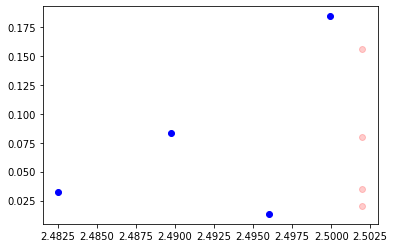

In [68]:
plt.plot(final_a_list,e_list,"bo")
plt.plot(starting_a_list,starting_e_list,"ro",alpha = 0.2)
plt.show()

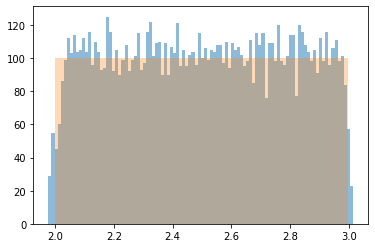

In [31]:
plt.hist(final_a_list,bins=100,alpha=0.5,label="final")#,range=(1,4))
plt.hist(starting_a_list,bins=100,alpha=0.3,label="start")
plt.show()

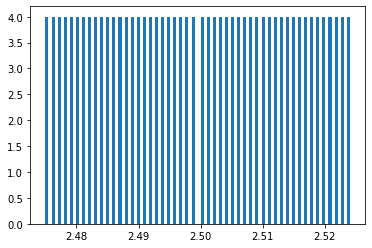

In [10]:
plt.hist(starting_a_list,bins=100)#,range=(1,4))
plt.show()

In [ ]:
print(((a_list)))

In [69]:
sim.status()

---------------------------------
REBOUND version:     	3.19.1
REBOUND built on:    	Jan 14 2022 11:24:53
Number of particles: 	0
Selected integrator: 	whfast
Simulation time:     	3.9999999942900152e+06
Current timestep:    	0.100000
---------------------------------
